In [1]:
# 2020년 3월 BC 카드 분석본  

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 202003]

213175
306122


In [6]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
177298,202003,20,여가/스포츠,2013,여행,남성,20대,1인가구,서울특별시,구로구,궁동,201000,5
177304,202003,13,가구,1314,기타,여성,50대,성인자녀가구,서울특별시,강동구,길동,366020,5
177305,202003,20,여가/스포츠,2012,문화,남성,30대,신혼영유아가구,서울특별시,강동구,길동,396400,4
177306,202003,20,여가/스포츠,2013,여행,여성,20대,1인가구,서울특별시,강동구,길동,4934890,75
177307,202003,15,전자,1511,디지털,남성,20대,신혼영유아가구,서울특별시,강동구,길동,85200,4
177308,202003,15,전자,1511,디지털,남성,20대,1인가구,서울특별시,강동구,길동,5903422,36
177309,202003,99,기타,9911,기타결제,남성,50대,성인자녀가구,서울특별시,강동구,길동,2591500,12
177310,202003,12,뷰티,1211,메이크업,여성,20세 미만,1인가구,서울특별시,강동구,길동,150591,5
177311,202003,12,뷰티,1212,바디케어,여성,50대,성인자녀가구,서울특별시,강동구,길동,523576,10
177314,202003,99,기타,9911,기타결제,남성,20대,1인가구,서울특별시,광진구,능동,17500,4


In [7]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    51132
남성    28763
Name: 성별, dtype: int64


<AxesSubplot:>

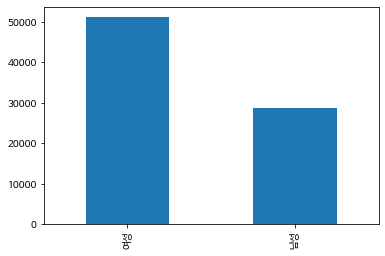

In [8]:
print(df_1903['성별'].value_counts())
df_1903['성별'].value_counts().plot.bar()

6 개
['60대 이상', '40대', '30대', '20세 미만', '20대', '50대']
40대       23769
30대       23509
20대       16305
50대       10653
60대 이상     4503
20세 미만     1156
Name: 연령, dtype: int64


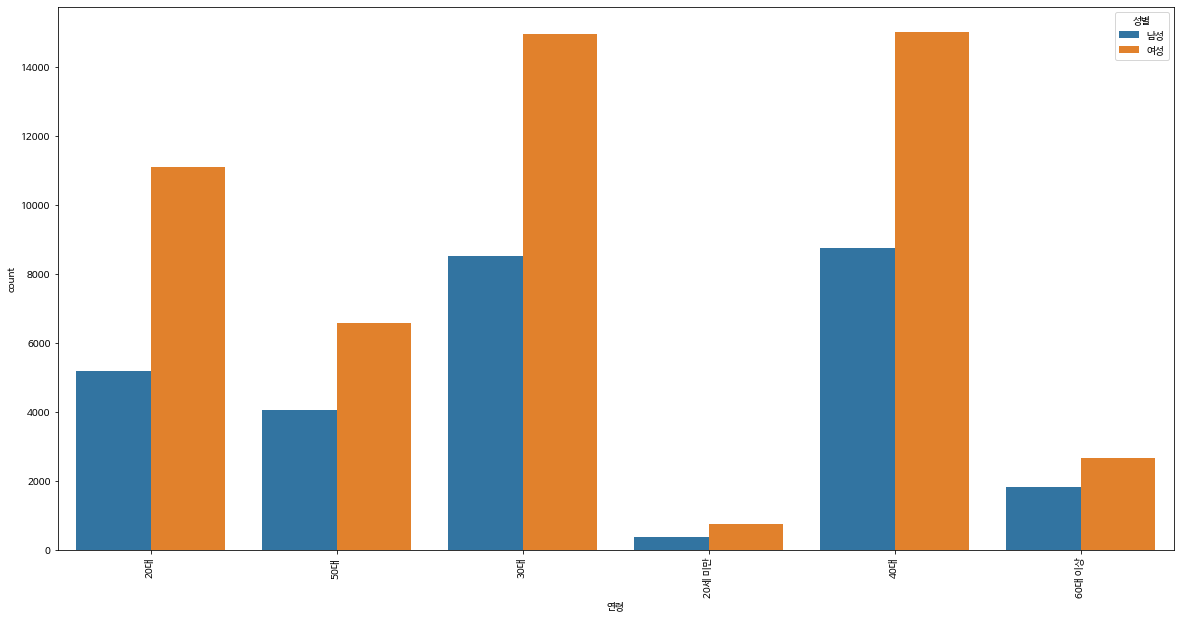

여성 연령 분포 및 순위
40대       15010
30대       14975
20대       11121
50대        6575
60대 이상     2683
20세 미만      768
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
40대       8759
30대       8534
20대       5184
50대       4078
60대 이상    1820
20세 미만     388
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


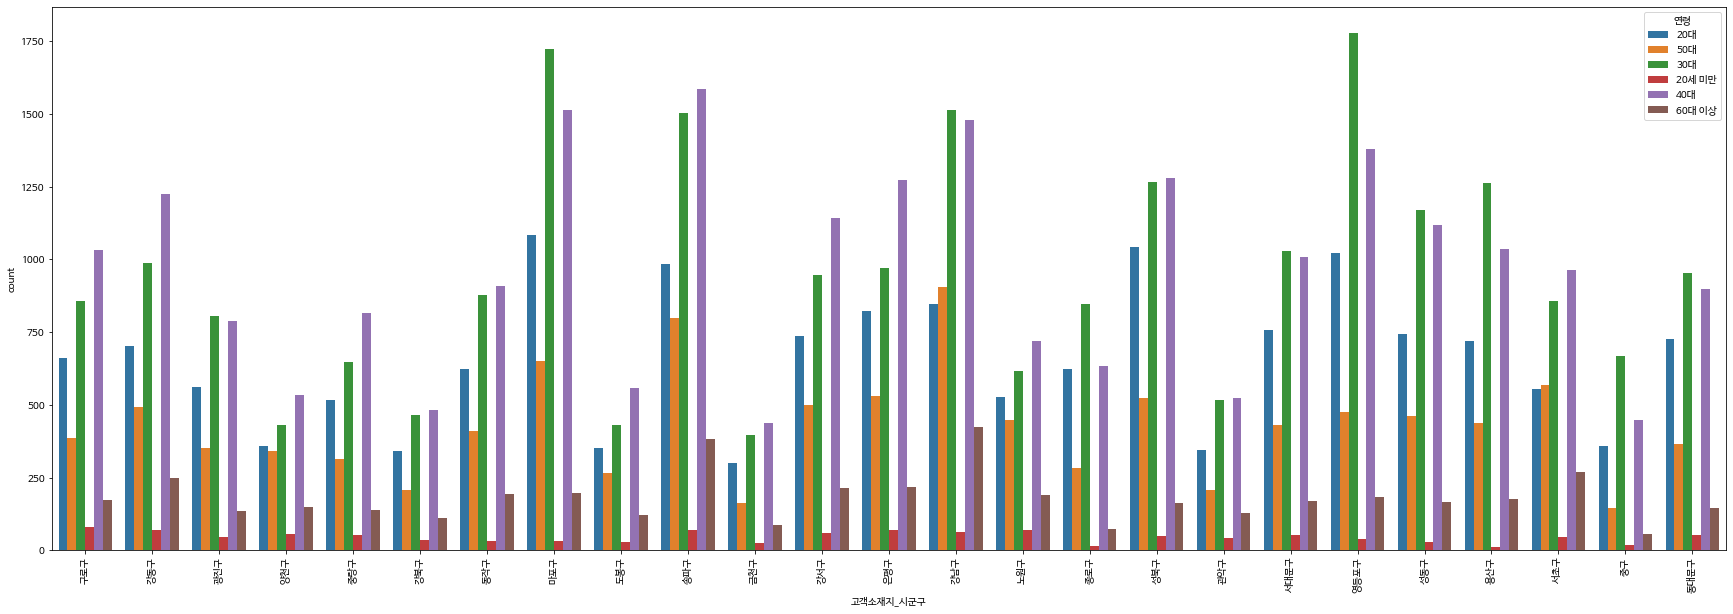

In [9]:
age = list(set(df_1903['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_1903['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

df_1903_female =df_1903[df_1903['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_1903_female['연령'].value_counts())
print(df_1903_female['연령'].value_counts().rank(ascending = False))

df_1903_male =df_1903[df_1903['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_1903_male['연령'].value_counts())
print(df_1903_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

25 개
['성동구', '동작구', '마포구', '광진구', '금천구', '성북구', '관악구', '종로구', '도봉구', '구로구', '은평구', '노원구', '강서구', '동대문구', '중구', '중랑구', '서초구', '강동구', '강북구', '용산구', '영등포구', '강남구', '송파구', '양천구', '서대문구']


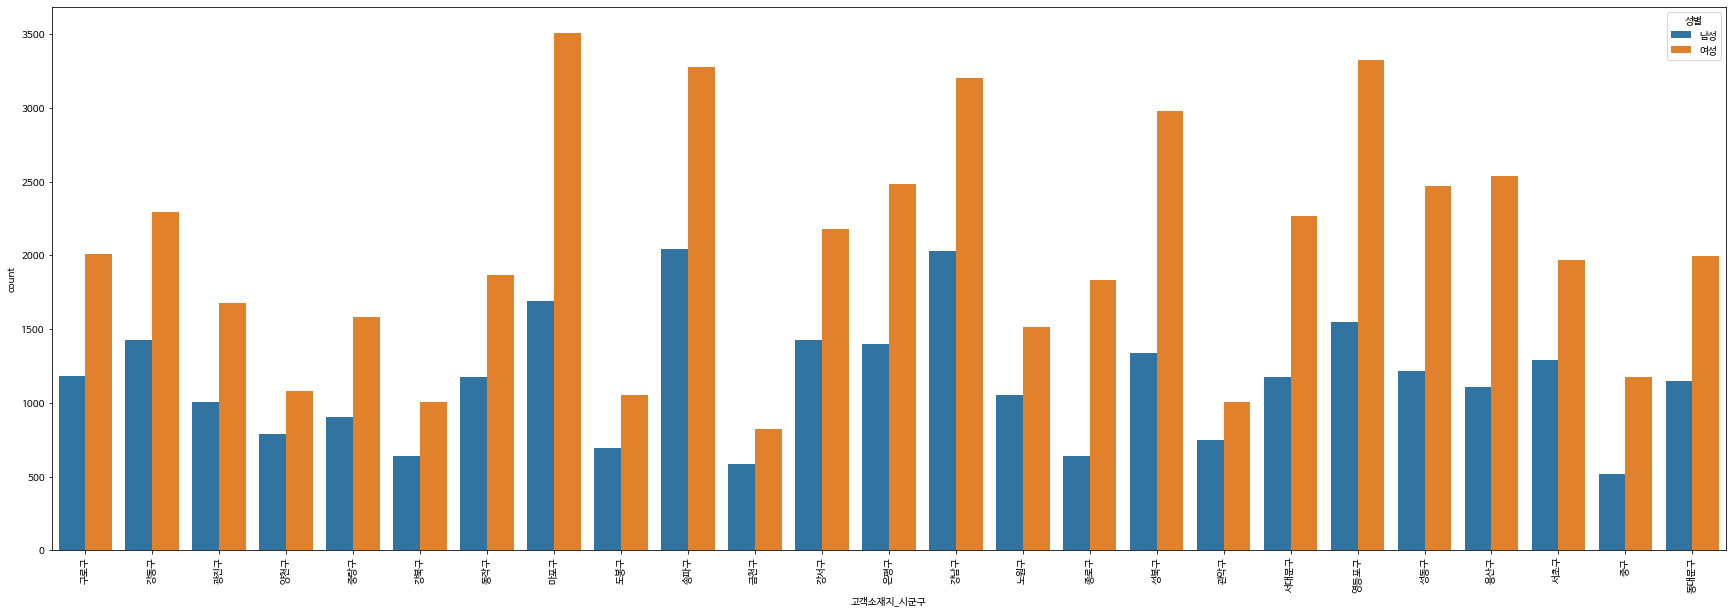

마포구     1.0
영등포구    2.0
송파구     3.0
강남구     4.0
성북구     5.0
Name: 고객소재지_시군구, dtype: float64
송파구     1.0
강남구     2.0
마포구     3.0
영등포구    4.0
강동구     5.0
Name: 고객소재지_시군구, dtype: float64


In [10]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

###################################### 필요한지에 대해서 의문
# print(df_1903['고객소재지_시군구'].value_counts()) 
# 이게 의미하는 바가 여성 의류 13건(==> 여성 의류별 1건) +  남성 의류 2건(==> 남성 의류별 1건) +  ,,,
# 이렇게 진행되는데 그냥 시군구별row를 개수 세서 저장하는건데 필요한지는 의문
# 아니면 내가 이걸 잘못 이해하고 있는 것일 수도 있음

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

print(df_1903_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_1903_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['성인자녀가구', '초중고자녀가구', '신혼영유아가구', '1인가구', '노인가구']
신혼영유아가구    27212
1인가구       20765
초중고자녀가구    14812
성인자녀가구     12603
노인가구        4503
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

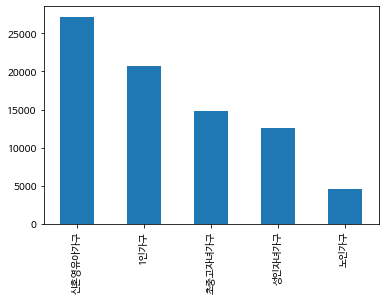

In [11]:
family = list(set(df_1903['가구생애주기']))
print(len(family),'개')
print(family)

print(df_1903['가구생애주기'].value_counts())
df_1903['가구생애주기'].value_counts().plot.bar()

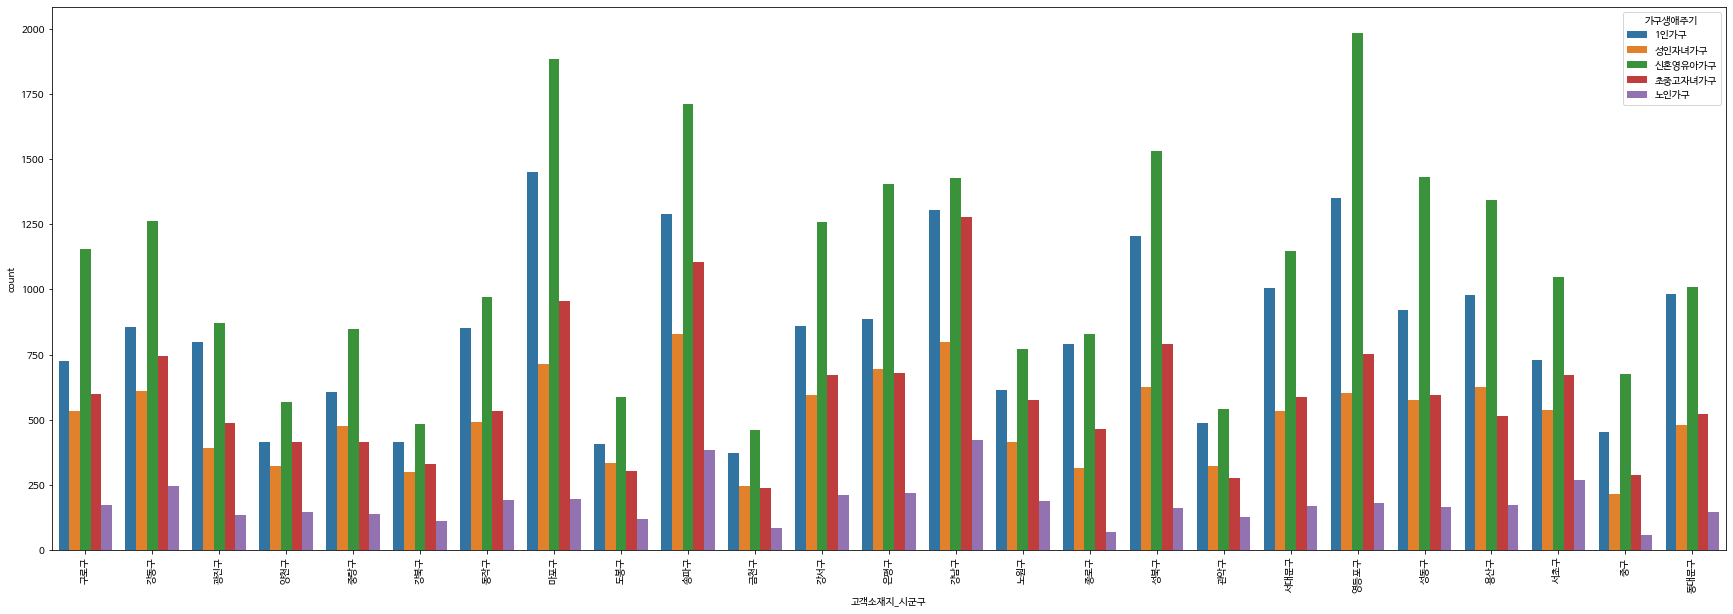

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 이렇게 한번에 보는 것도 방법이지만 따로 시군구 별로 plot해서 만드는거 계획 예정
# 추가로 명수라고 해야 되나 그 건수?도 추가 예정
# ex) 군포시 1인가구 : 123, 노인가구 : 123


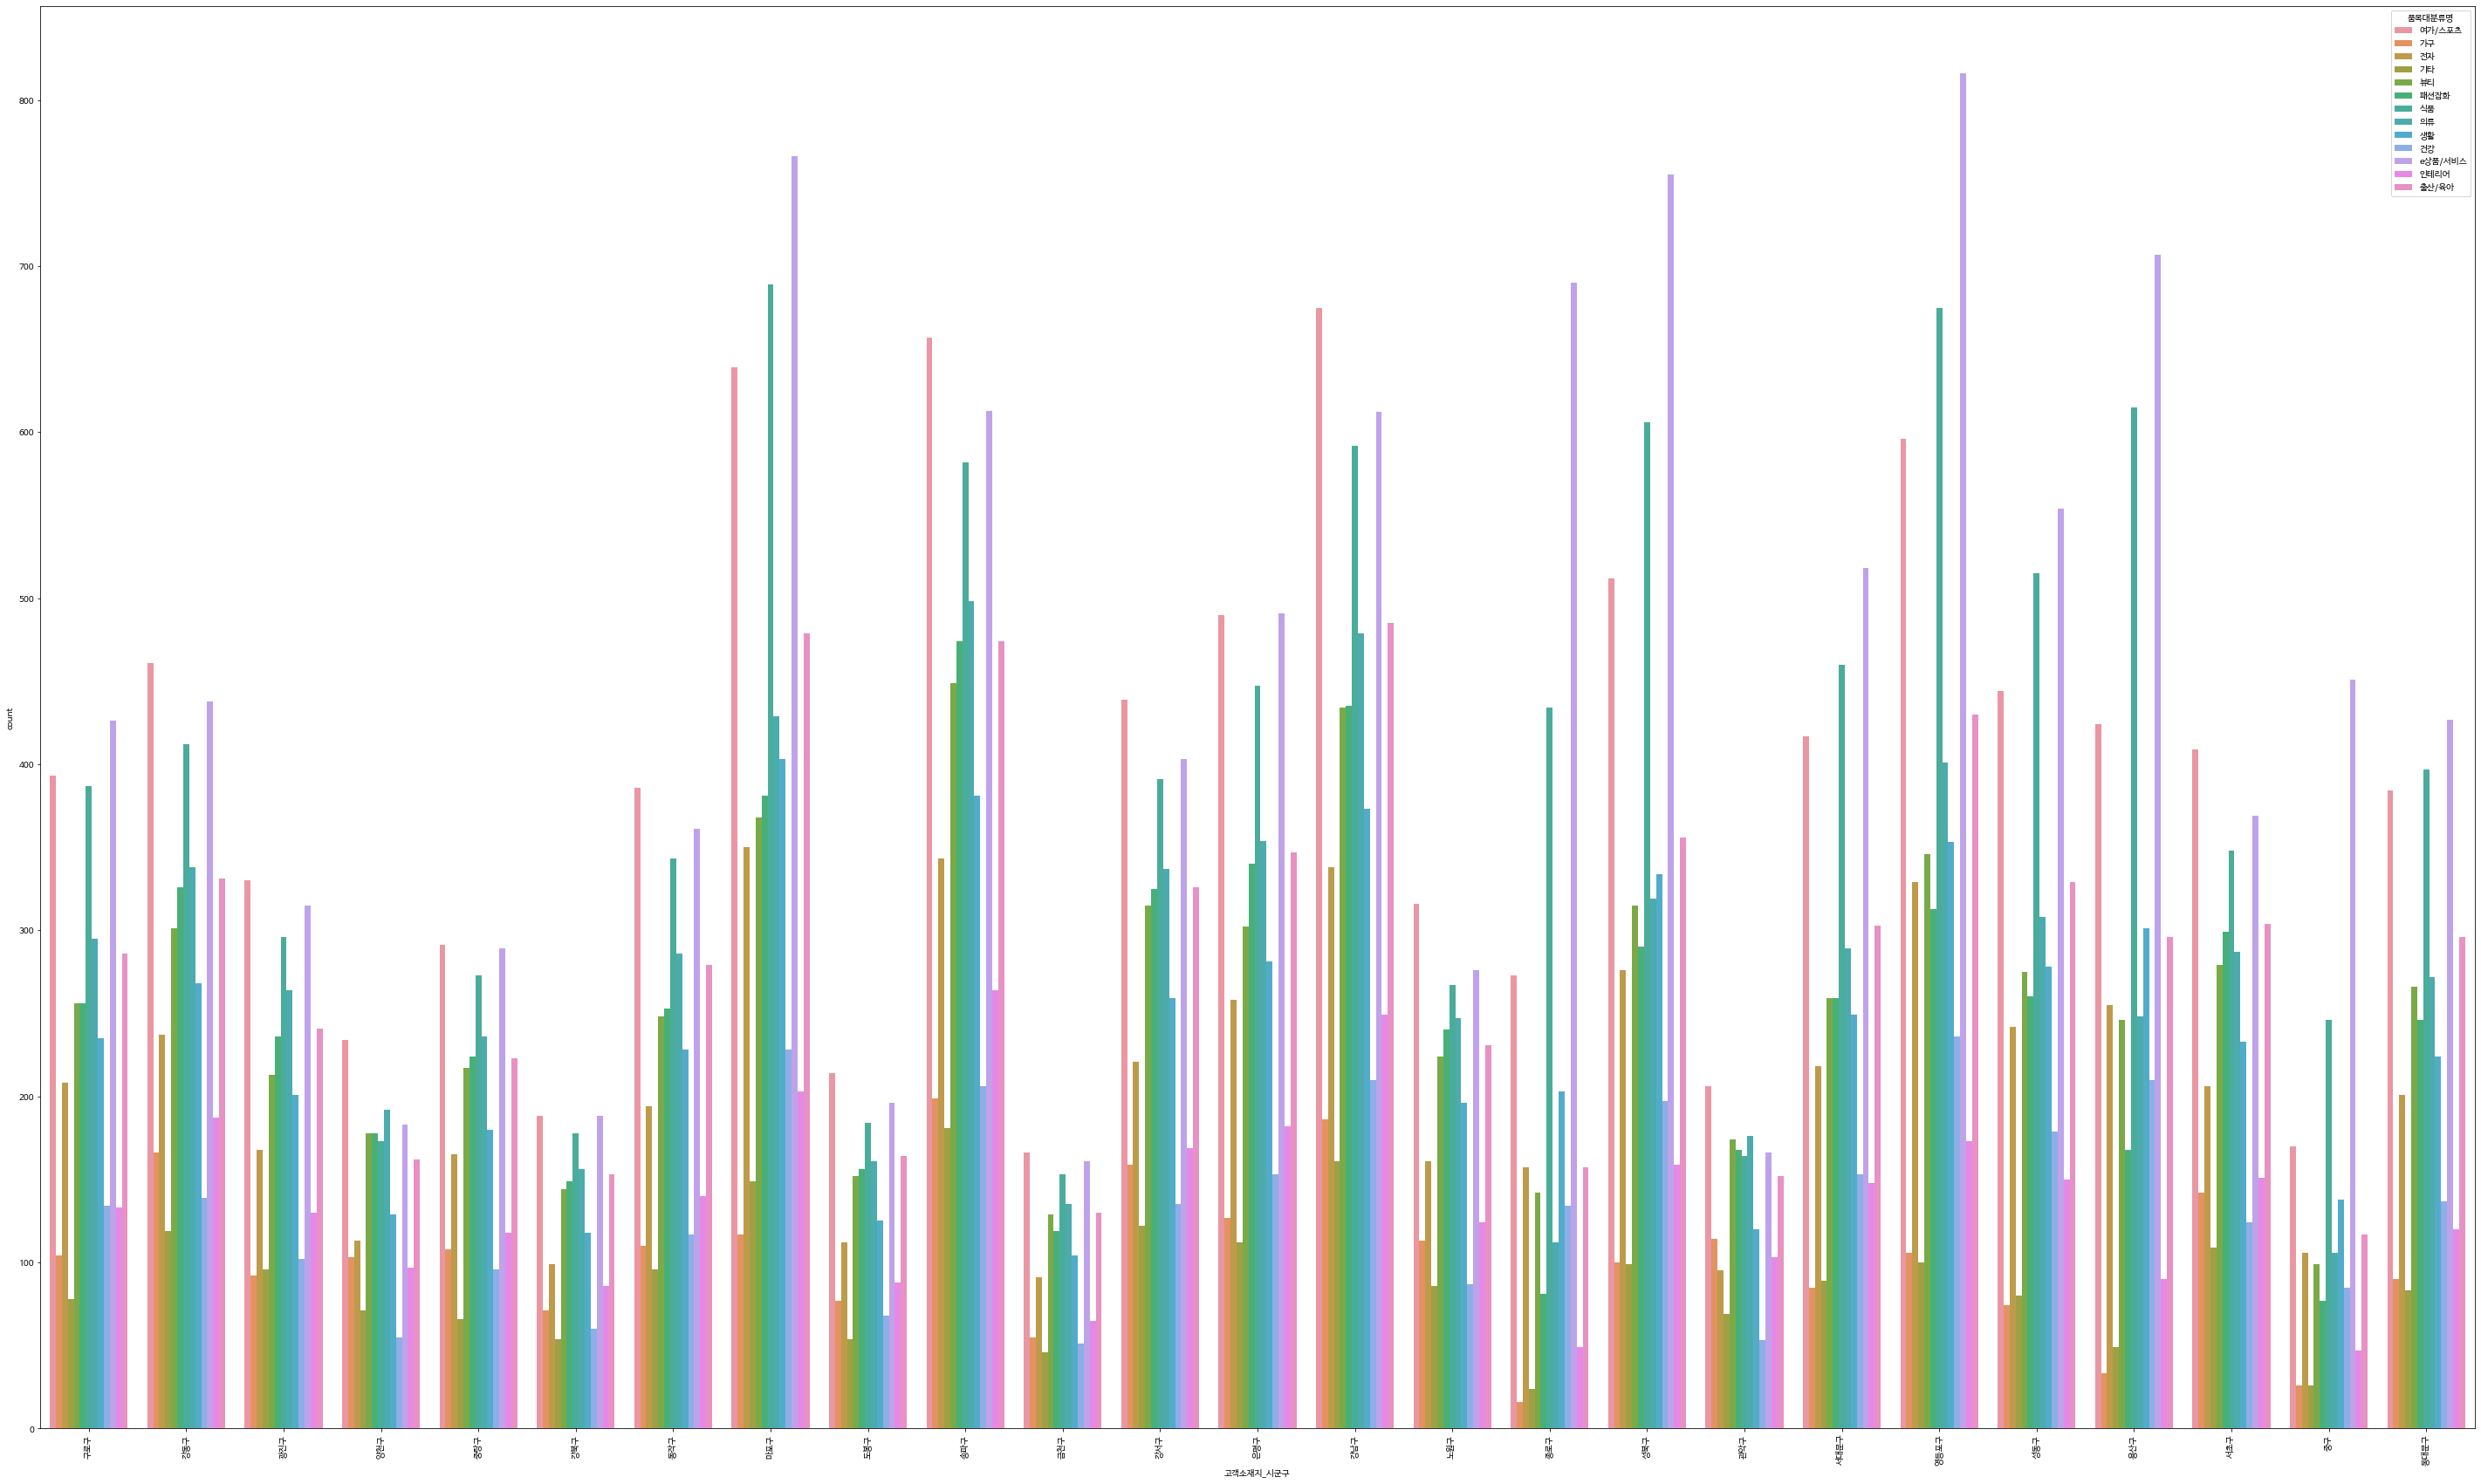

In [13]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

고객소재지_시군구
강남구     12054951434
강동구      6682288704
강북구      3417657015
강서구      8593699956
관악구      8107733192
광진구      5338322774
구로구      5694128322
금천구      3090373452
노원구      6755759591
도봉구      3574779552
동대문구     4829854049
동작구      6029447611
마포구      7015664929
서대문구     5207002152
서초구      8425334441
성동구      4643477675
성북구      5376719767
송파구     11222172600
양천구      6502060982
영등포구     6100328307
용산구      3701291350
은평구      6071108827
종로구      1838553062
중구       2051185734
중랑구      4635679664
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

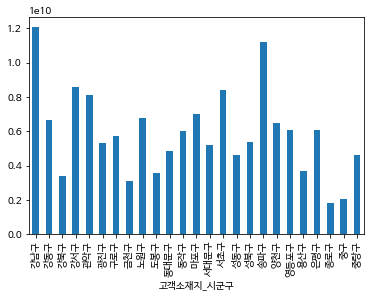

In [14]:
df_1903_매출금액합 = df_1903.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_1903_매출금액합)
df_1903_매출금액합.plot.bar()

고객소재지_시군구
강남구     241159
강동구     155455
강북구      88047
강서구     207501
관악구     203888
광진구     127849
구로구     139630
금천구      77940
노원구     164995
도봉구      87322
동대문구    119932
동작구     142032
마포구     154990
서대문구    121406
서초구     162939
성동구     102302
성북구     131831
송파구     244638
양천구     144502
영등포구    140037
용산구      77534
은평구     147097
종로구      43957
중구       44889
중랑구     118674
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

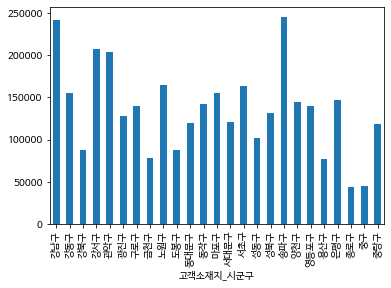

In [15]:
df_1903_매출건수합 = df_1903.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_1903_매출건수합)
df_1903_매출건수합.plot.bar()